Defaulting to user installation because normal site-packages is not writeable
✅ TensorFlow version: 2.20.0
✅ Num GPUs Available: 0
Found 4631 images belonging to 5 classes.
Found 1157 images belonging to 5 classes.

✅ Classes detected: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4}
Training samples: 4631
Validation samples: 1157


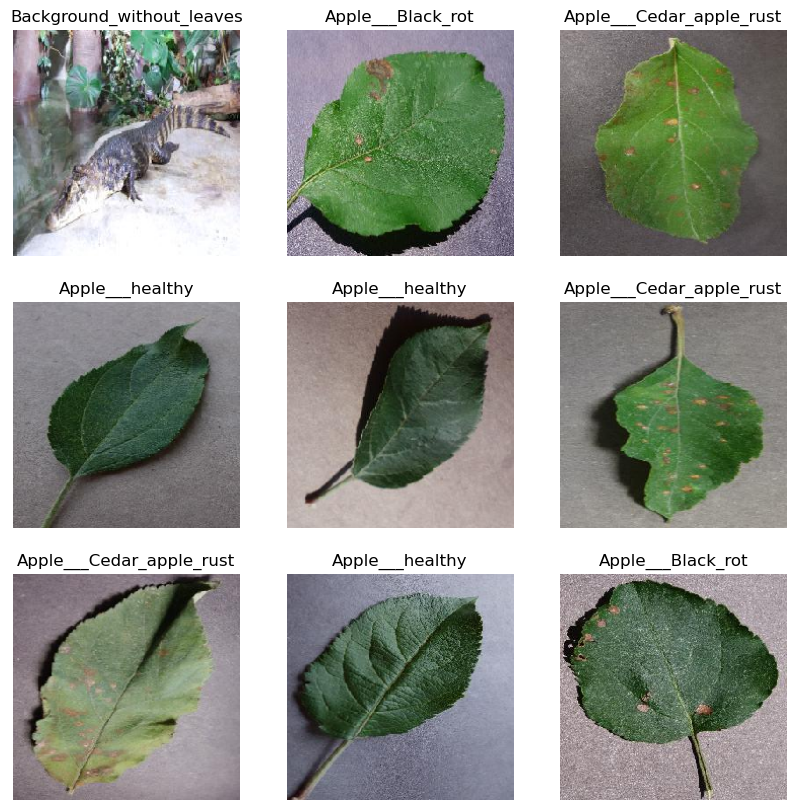

In [9]:
# =====================================
# STEP 1: Install required libraries
# =====================================
!pip install tensorflow keras matplotlib numpy

# =====================================
# STEP 2: Import libraries
# =====================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ TensorFlow version:", tf.__version__)
print("✅ Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# =====================================
# STEP 3: Define directory path
# =====================================
# Your image folders are located in the current directory:
# ./Apple___Apple_scab
# ./Apple___Black_rot
# ./Apple___Cedar_apple_rust
# ./Apple___healthy
# (Optionally also ./Background_without_leaves)

base_dir = "../Data/AppleData"

# Check if directory exists
# if not os.path.exists(base_dir):
#     raise FileNotFoundError(f"⚠️ Folder not found: {base_dir}\nPlease update 'base_dir' to the correct path.")

# =====================================
# STEP 4: Prepare ImageDataGenerators
# =====================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80/20 split for training and validation
)

# Training generator
train_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# =====================================
# STEP 5: Verify dataset
# =====================================
print("\n✅ Classes detected:", train_generator.class_indices)
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

# =====================================
# STEP 6: Preview a few sample images
# =====================================
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    label_idx = np.argmax(y_batch[i])
    label = list(train_generator.class_indices.keys())[label_idx]
    plt.title(label)
    plt.axis('off')
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 47s 317ms/step - accuracy: 0.7309 - loss: 0.7164 - val_accuracy: 0.9334 - val_loss: 0.2214
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 313ms/step - accuracy: 0.9005 - loss: 0.2810 - val_accuracy: 0.9032 - val_loss: 0.2604
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 310ms/step - accuracy: 0.9320 - loss: 0.2053 - val_accuracy: 0.9386 - val_loss: 0.2000
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 310ms/step - accuracy: 0.9510 - loss: 0.1375 - val_accuracy: 0.9369 - val_loss: 0.2101
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 313ms/step - accuracy: 0.9613 - loss: 0.1177 - val_accuracy: 0.9369 - val_loss: 0.2171
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 46s 314ms/step - accuracy: 0.9633 - loss: 0.1064 - val_accuracy: 0.9248 - val_loss: 0.2728
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.9598 - loss: 0.1187 - val_accuracy: 0.9533 - val_loss: 0.1722
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 310ms/step - accuracy: 0.9773 - loss: 0

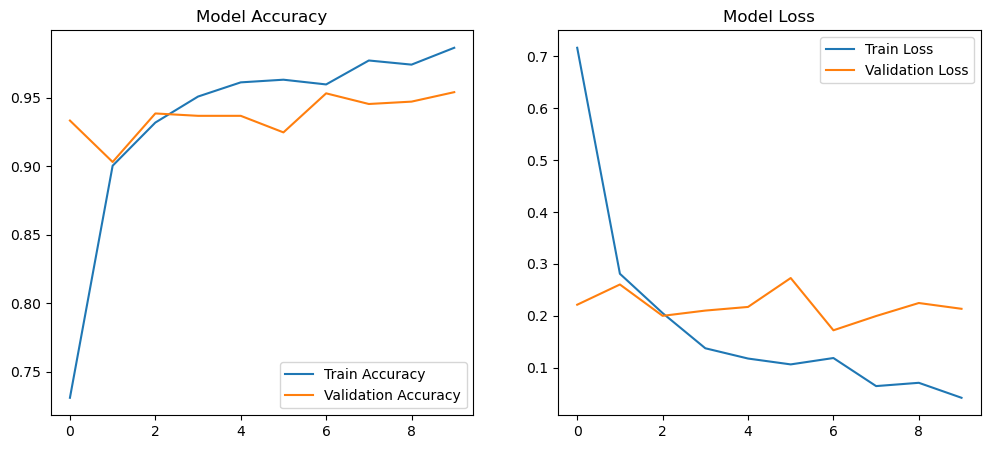

In [10]:
# =====================================
# STEP 1: Build CNN model
# =====================================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# =====================================
# STEP 2: Train CNN model
# =====================================
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# =====================================
# STEP 3: Plot training accuracy and loss
# =====================================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


Detected classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves']
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step
Total validation samples: 1157

Validation samples per class:
0 (Apple___Apple_scab): 200
1 (Apple___Black_rot): 200
2 (Apple___Cedar_apple_rust): 200
3 (Apple___healthy): 329
4 (Background_without_leaves): 228

Classification Report:
                           precision    recall  f1-score   support

       Apple___Apple_scab       0.97      0.87      0.92       200
        Apple___Black_rot       0.94      0.95      0.95       200
 Apple___Cedar_apple_rust       0.98      0.98      0.98       200
          Apple___healthy       0.93      0.96      0.95       329
Background_without_leaves       0.97      0.99      0.98       228

                 accuracy                           0.95      1157
                macro avg       0.96      0.95      0.95      1157
             weighted avg       0.95      0.95   

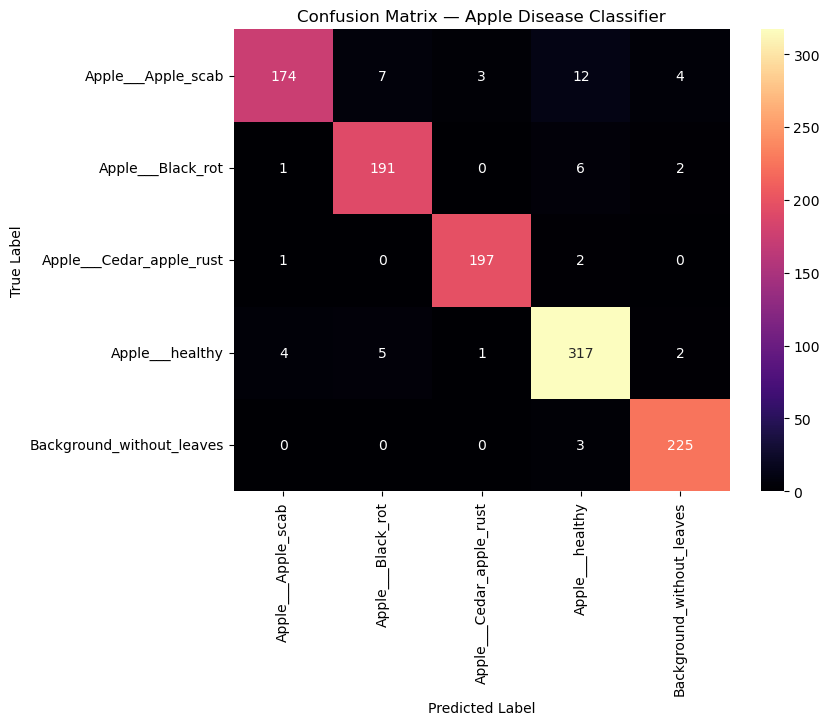

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# =====================================
# STEP 1: Extract class names correctly
# =====================================
# These are the class names in generator order
class_names = list(validation_generator.class_indices.keys())
print("Detected classes:", class_names)

# =====================================
# STEP 2: Get true labels and predictions
# =====================================
validation_generator.reset()

pred_probs = model.predict(validation_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = validation_generator.classes

print("Total validation samples:", len(y_true))

# Show actual validation counts
unique, counts = np.unique(y_true, return_counts=True)
print("\nValidation samples per class:")
for idx, c in zip(unique, counts):
    print(f"{idx} ({class_names[idx]}): {c}")

# =====================================
# STEP 3: Build confusion matrix
# =====================================
cm = confusion_matrix(y_true, y_pred)

# Labels sklearn should use
labels = sorted(np.unique(y_true))

# Correct class names for only the labels present
labels_names = [class_names[i] for i in labels]

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    labels=labels,
    target_names=labels_names
))

# =====================================
# STEP 4: Plot confusion matrix heatmap
# =====================================
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Apple Disease Classifier")
plt.show()
